### Student Information
Name:
鍾明遠

Student ID:
108011557

GitHub ID:
mchung0417

---

### Instructions

1. First: do the **take home** exercises in the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM19-Lab1-Master Repo](https://github.com/EvaArevalo/DM19-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. 
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy :'(, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/EvaArevalo/DM19-Lab1-Master/blob/master/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (Oct. 29th 11:59 pm, Tuesday)__. 

---

###  > First - take home excercise in DM Lab1 Master

 Exercise 2 (take home):
 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [5]:
import sklearn
from sklearn.datasets import fetch_20newsgroups
import pandas as pd
import helpers.data_mining_helpers as dmh


categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
twenty_train = fetch_20newsgroups(subset='train', categories=categories, \
                                  shuffle=True, random_state=42)

X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))
X.iloc[15:2000:5,0:4:2][0:15]

,text,category_name
15,From: Mike_Peredo@mindlink.bc.ca (Mike Peredo)...,comp.graphics
20,From: dotsonm@dmapub.dma.org (Mark Dotson) Sub...,soc.religion.christian
25,From: dstampe@psych.toronto.edu (Dave Stampe) ...,comp.graphics
30,From: vgwlu@dunsell.calgary.chevron.com (greg ...,sci.med
35,From: BOCHERC@hartwick.edu Subject: Does God L...,soc.religion.christian
40,From: david-s@hsr.no (David A. Sjoen) Subject:...,soc.religion.christian
45,From: jaeger@buphy.bu.edu (Gregg Jaeger) Subje...,alt.atheism
50,From: ab@nova.cc.purdue.edu (Allen B) Subject:...,comp.graphics
55,From: ken@cs.UAlberta.CA (Huisman Kenneth M) S...,comp.graphics
60,From: Nanci Ann Miller <nm0w+@andrew.cmu.edu> ...,alt.atheism


---

Exercise 5 (take home):

There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [2]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [3]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

In [4]:
NA_df.replace(to_replace=['NaN','None',''], value=np.nan,inplace=True)
NA_df['missing_example'].isnull()

0    True
1    True
2    True
3    True
4    True
5    True
Name: missing_example, dtype: bool

Because isnull() function can only find judge np.nan kind missing value

in order to use it properly,I replace the different kind of missing value to np.nan

that makes isnull() function works

--- 

 Exercise 6 (take home):
        
Notice any changes to the `X` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [5]:
len(X)

2257

In [6]:
X_sample = X.sample(n=1000) #random state

In [7]:
len(X_sample)

1000

In [8]:
X_sample.sort_index()

,text,category,category_name
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian
6,From: jodfishe@silver.ucs.indiana.edu (joseph ...,3,soc.religion.christian
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
9,From: libman@hsc.usc.edu (Marlena Libman) Subj...,2,sci.med
11,From: amjad@eng.umd.edu (Amjad A Soomro) Subje...,1,comp.graphics
13,Subject: So what is Maddi? From: madhaus@netco...,0,alt.atheism
14,From: sloan@cis.uab.edu (Kenneth Sloan) Subjec...,1,comp.graphics


I found that X_sample is random select form X , everytime I try to sample it,

X_sample is different , I thought that if I want to get the proper subset from X,

I should add some conditions like 'sample from each category proportional 

---

Exercise 8 (take home):

We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

![alt txt](https://i.imgur.com/9eO431H.png)

In [14]:
import matplotlib.pyplot as plt
class_a= X.category_name.value_counts()
class_b = X_sample.category_name.value_counts()
plt.figure(figsize=(8,6))
plt.bar(categories, class_a, label = 'class_a', align = "edge", width = -0.25)
plt.bar(categories, class_b, label = 'class_b', align = "edge", width = 0.25)
plt.legend(labels=['X','X_sample'])
plt.ylabel('counts')
plt.title('Category distribution')

NameError: name 'X_sample' is not defined

---

 Exercise 10 (take home):
 
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

---

Exercise 11 (take home):

From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

---

 Exercise 12 (take home):
 
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

---

Exercise 13 (take home):
 
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

---

Exercise 14 (take home):

The chart above contains all the vocabulary, and it's computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 

---

Exercise 15 (take home):

Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

---

Exercise 16 (take home):

Try to generate the binarization using the `category_name` column instead. Does it work?

###  > Second - The new dataset,follow the steps in DM Lab1 msater

In [6]:
imdb = pd.read_csv('imdb_labelled.txt',sep='\t',header = None)
imdb.columns = ['sentence','score']
amazon = pd.read_csv('amazon_cells_labelled.txt',sep='\t',header = None)
amazon.columns = ['sentence','score']
yelp = pd.read_csv('yelp_labelled.txt',sep='\t',header = None)
yelp.columns = ['sentence','score']
Y = pd.concat([imdb,amazon,yelp],axis = 0)
Y.reset_index(drop=True, inplace=True)

In [7]:
Y.isnull().apply(lambda x: dmh.check_missing_values(x))

sentence    (The amoung of missing records is: , 0)
score       (The amoung of missing records is: , 0)
dtype: object

In [8]:
Y[Y.duplicated('sentence',keep = False)]

,sentence,score
90,Definitely worth checking out.,1
125,10/10,1
363,Definitely worth checking out.,1
572,Not recommended.,0
585,Not recommended.,0
788,10/10,1
1018,Works great!.,1
1179,If you like a loud buzzing to override all you...,0
1180,Don't buy this product.,0
1187,Great phone!.,1


In [9]:
Y.drop_duplicates(keep='first', inplace=True)

I cascade imdb,yelp,amazon three data set to Y 

check it and there is no null value in 'sentance' and 'score' columns

find out there are 34 duplicate 'sentence' and they have same 'score'

so I keep the duplicate 'sentance' that shows first time and delete the others.

---

In [29]:
import nltk
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords 
from nltk.stem import PorterStemmer
import pandas as pd
word_tokenize = RegexpTokenizer('\w+')
Y['sentence'] = Y['sentence'].str.lower()
Y['sentence']= Y['sentence'].apply(lambda x:word_tokenize.tokenize(x))
Y['sentence'].iloc[0:5]

0    [slow, move, aimless, movi, distress, drift, y...
1    [sure, lost, flat, charact, audienc, nearli, h...
2    [attempt, arti, black, white, clever, camera, ...
3                         [littl, music, anyth, speak]
4    [best, scene, movi, gerardo, tri, find, song, ...
Name: sentence, dtype: object

lower the letters then use RegexpTokenizer to tokenize the sentence and remove the punctuation mark

In [30]:
stop = stopwords.words('english')
Y['sentence']=Y['sentence'].apply(lambda x: [item for item in x if item not in stop])
Y['sentence'].iloc[0:5]

0    [slow, move, aimless, movi, distress, drift, y...
1    [sure, lost, flat, charact, audienc, nearli, h...
2    [attempt, arti, black, white, clever, camera, ...
3                         [littl, music, anyth, speak]
4    [best, scene, movi, gerardo, tri, find, song, ...
Name: sentence, dtype: object

remove the stopwords

In [31]:
stemming=PorterStemmer()
Y['sentence']=Y['sentence'].apply(lambda x:[stemming.stem(word) for word in x])
Y['sentence']=Y['sentence'].apply(lambda x:' '.join(x))
Y[0:5]

,sentence,score
0,slow move aimless movi distress drift young man,0
1,sure lost flat charact audienc nearli half walk,0
2,attempt arti black white clever camera angl mo...,0
3,littl music anyth speak,0
4,best scene movi gerardo tri find song keep run...,1


stemming the words,then return list to str

After the steps above, I get the clean dataset for further analysis

###  > Third - The new dataset,TF IDF and Naive Bayes classifier

Text(0.5,1,'feedback distribution')

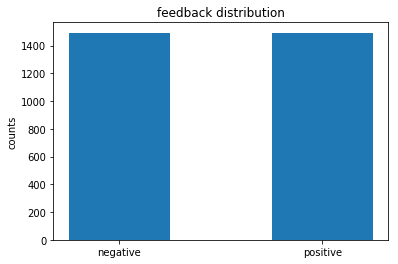

In [32]:
import matplotlib.pyplot as plt
[count0,count1]=Y['score'].value_counts()
plt.figure()
plt.bar(['negative','positive'],[count0,count1],width=0.5)
plt.ylabel('counts')
plt.title('feedback distribution')

For data exploration and visualization,I count the number of different kind of feedback.

As the histogram , we can found that the count of different feedback is almost the same.

I think it is a good news that means there is no data imblanced question.

In [33]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfTransformer
vectorizer = CountVectorizer()
Y_vec = vectorizer.fit_transform(Y.sentence)
word = vectorizer.get_feature_names()

In [34]:
words = {}
for i in range(len(word)):
    words[i]=word[i]
tf = pd.DataFrame(Y_vec.toarray())
tf = tf.rename(words,axis = 1)
tf.loc['count']=tf.sum(axis = 0)

In [59]:
tf_= pd.DataFrame(tf.loc['count'])
tf_.sort_values(by = 'count',ascending=False,inplace = True)
tf_ = tf_.apply(lambda x :x/tf_['count'].sum())
tf_[0:30]

,count
good,0.012709
movi,0.011714
great,0.011327
film,0.010443
phone,0.009614
one,0.008233
like,0.007901
work,0.007901
time,0.007570
food,0.006962


<function matplotlib.pyplot.show(*args, **kw)>

<Figure size 432x288 with 0 Axes>

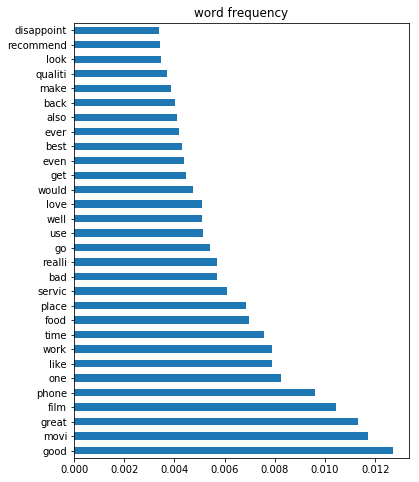

In [61]:
plt.figure()
tf_[0:30].plot(kind ='barh',title='word frequency',figsize=(6,8),legend = None)
plt.show()

In [98]:
transformer = TfidfTransformer()
tfidf = transformer.fit_transform(Y_vec)
tfidf = pd.DataFrame(tfidf.toarray())
tfidf = tfidf.rename(words,axis = 1)
tfidf_ = pd.DataFrame(tfidf.mean(axis=0),word)
tfidf_.columns=['tfidf']
tfidf_.sort_values(by='tfidf',ascending=False,inplace = True)
tfidf_[0:30]

,tfidf
good,0.022766
great,0.022588
movi,0.017340
phone,0.016597
work,0.015737
film,0.014707
servic,0.013968
food,0.013752
place,0.013134
time,0.012659


<Figure size 432x288 with 0 Axes>

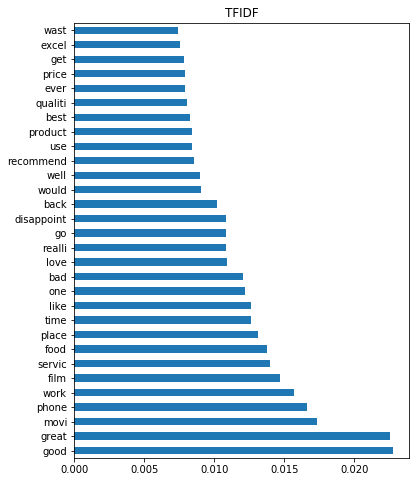

In [99]:
plt.figure()
tfidf_[0:30].plot(kind ='barh',title='TFIDF',figsize=(6,8),legend = None)
plt.show()